## Introduction
This case study is focus on analyze Raman Spectra data of Chronic Wasting Disease(CWD). CWD is a transmissible spongiform encephalopathy of deer and elk. The incubation period for CWD is 2-4 years. Infected animals have a relatively long ‘preclinical’ phase of disease where they show no clinical signs. 

Raman spectroscopy is a physical method capable of providing a detailed biochemical profile of living tissues. The Raman effect occurs when a focused light beam (laser) interacts with the electron cloud and chemical bonds of tissue molecules. The difference between the basal and excitatory state results in photon emission, which can be captured by a Raman spectrophotometer. 

Thus, we propose to evaluate the effectiveness of Raman spectroscopy on skin biopsies from white-tailed deer infected with CWD.

## Methods

#### Samples
All of samples are tail head skin from white tail deer. These skin samples for Raman analysis were fixed in formaldehyde, then rinsed with ethanol and embedded in paraffin. After embedding, they are put on gold slides. 20 Raman spectrums for each sample were measured under 532 nm laser. Exposure time of each spectrum was 20 seconds with 5 exposures. 

#### Analysis of Raman Spectra Data
In this case study, the mean and standard deviation were calculated in each sample so that we can get one Raman spectrum. To analysis of components and their spectral features in the specimen, the noise needs to be eliminated or minimized first. I used smoothing and baseline correction to process data in the Raman shift from 700 cm-1 to 2500 cm-1. The most widely used method for smoothing is called moving average. In python, rolling( ) is the function to create a rolling window. Baseline was corrected after smoothing. To compute the baseline of a given data, peakutils.baseline( ) was used.

In [4]:
pip install peakutils

  Stored in directory: /Users/juliachu/Library/Caches/pip/wheels/6d/52/9c/94cff100c9dd4ec0c72762947b8d5da6f6c0762cd5312b04ec
Successfully built peakutils
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import peakutils
import glob
import matplotlib.pyplot as plt

[1070. 1140. 1300. 1440.]
[1070. 1140. 1300. 1450.]
[1070. 1140. 1300. 1440.]
[1070. 1140. 1300. 1440.]
[1010. 1070. 1140. 1300. 1440.]


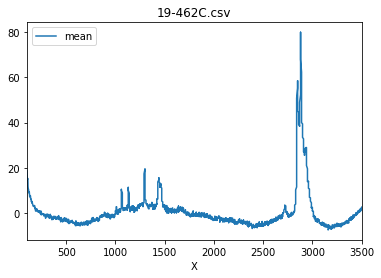

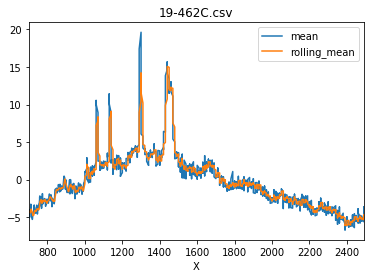

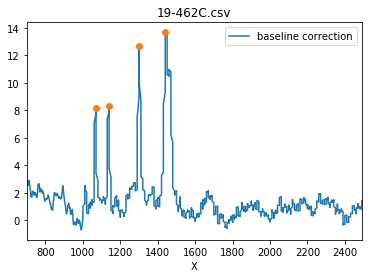

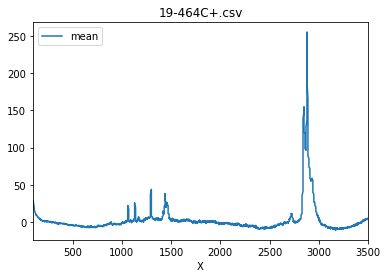

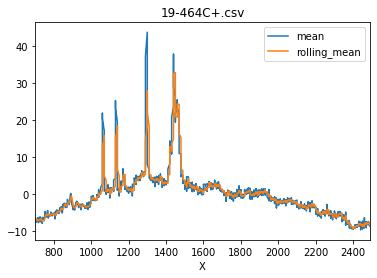

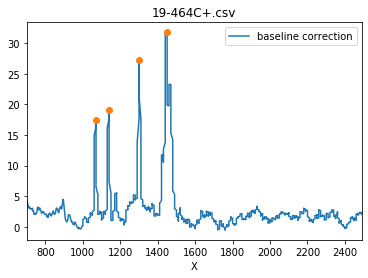

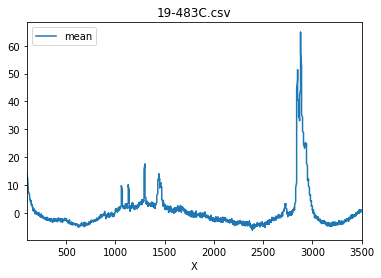

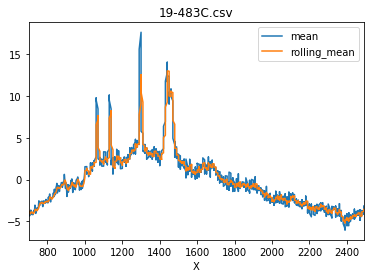

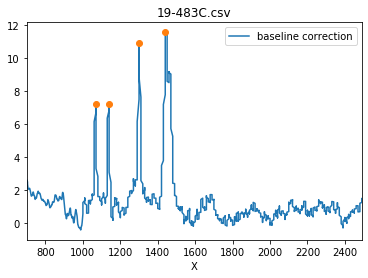

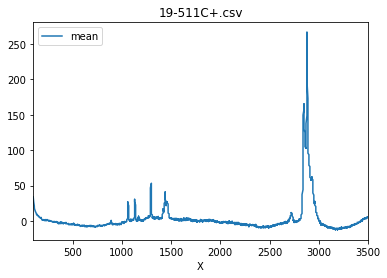

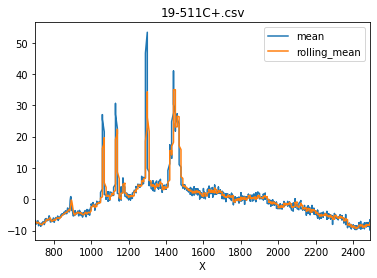

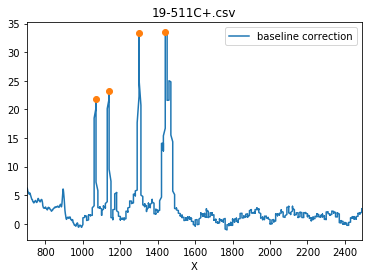

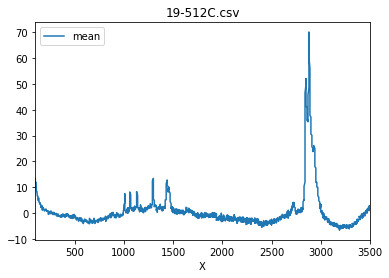

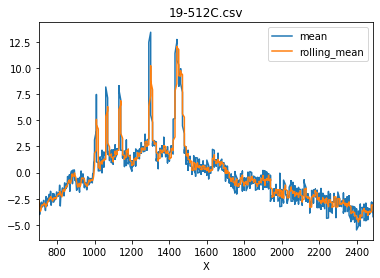

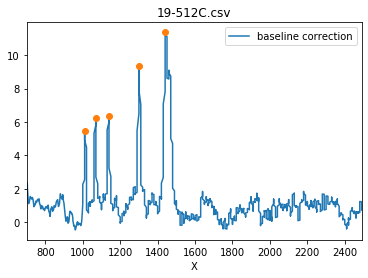

In [51]:
filenames = sorted(glob.glob('19-*.csv'))
for f in filenames:
    
    df= pd.read_csv(f)
    
    #Plot raw data
    df['mean']=df.loc[:,'1':].mean(axis=1)
    df['Std']=df.loc[:,'1':].std(axis=1)
    df.plot(x='X', y='mean',title=f)

    #Plot smoothed data by moving average method
    df['rolling_mean']=df['mean'].rolling(window=10).mean()
    df=df.drop(df[(df['X'] >= 2500) | (df['X'] <= 700)].index)
    df.plot(x='X', y=['mean','rolling_mean'], title=f)

    #Plot baseline corrected data by polynomial fitting method
    baseline_value=peakutils.baseline(df['rolling_mean'])
    df['baseline correction']=df['rolling_mean']-baseline_value
    df.plot(x='X', y='baseline correction', title=f)
    
    #Detect peak values
    col1=np.array(df['X'])
    col2=np.array(df['baseline correction'])
    peaks=peakutils.peak.indexes(col2,min_dist=50)
    print(col1[peaks])
    plt.plot(col1[peaks],col2[peaks], marker="o", ls="")


## Conclusion

After baselined corrected, there are four peaks performed on the Raman spectra at 1070 cm-1, 1140 cm-1, 1300 cm-1, 1440 cm-1.